# SHAP for 4-Week Model

Gaylen Fronk  
May 13, 2024

In [ ]:
study <- params$study
version <- params$version
y_col_name <- params$y_col_name


In [ ]:

# packages for script
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

In [ ]:

# handle conflicts
options(conflicts.policy = "depends.ok")


In [ ]:
# absolute paths
switch (Sys.info()[['sysname']],
        # PC paths
        Windows = {
          path_data <- str_c("P:/studydata/match/chtc/", y_col_name)},
        
        # IOS paths
        Darwin = {
          path_data <- str_c("/Volumes/private/studydata/match/chtc/", y_col_name)},
        
        # Linux paths
        Linux = {
          path_data <- str_c("~/mnt/private/studydata/match/chtc/", y_col_name)}
)


In [ ]:
# chunk defaults

options(tibble.width = Inf)
options(tibble.print_max = Inf)


## Read in data

In [ ]:
d <- read_csv(file.path(path_data, str_c("shap_", version), 
                        "output", "batch_results.csv"),
              col_types = "cddd")

glimpse(d)


Rows: 1,270,612
Columns: 4
$ variable_name  <chr> "age_1st_cig", "age_daily_smoker", "age_ehr", "alc_bing…
$ variable_value <dbl> 0.46270, 0.54570, 0.76030, 0.70470, 1.06600, 0.62950, -…
$ contribution   <dbl> -0.0043340563, 0.0000000000, 0.0000000000, 0.0000000000…
$ subid          <dbl> 40299, 40299, 40299, 40299, 40299, 40299, 40299, 40299,…

This is already local SHAP values because we have one observation per subid per variable.

## Get global Shapley values

In [ ]:
global <- d |> 
  group_by(variable_name) |> 
  summarize(mean_shap = mean(contribution),
            abs_shap = abs(mean(contribution))) |> 
  arrange(desc(abs_shap))


Treatment interactions only

In [ ]:
global_tx <- global |> 
  filter(str_detect(variable_name, "treatment_"))


## Make global figures

Overall

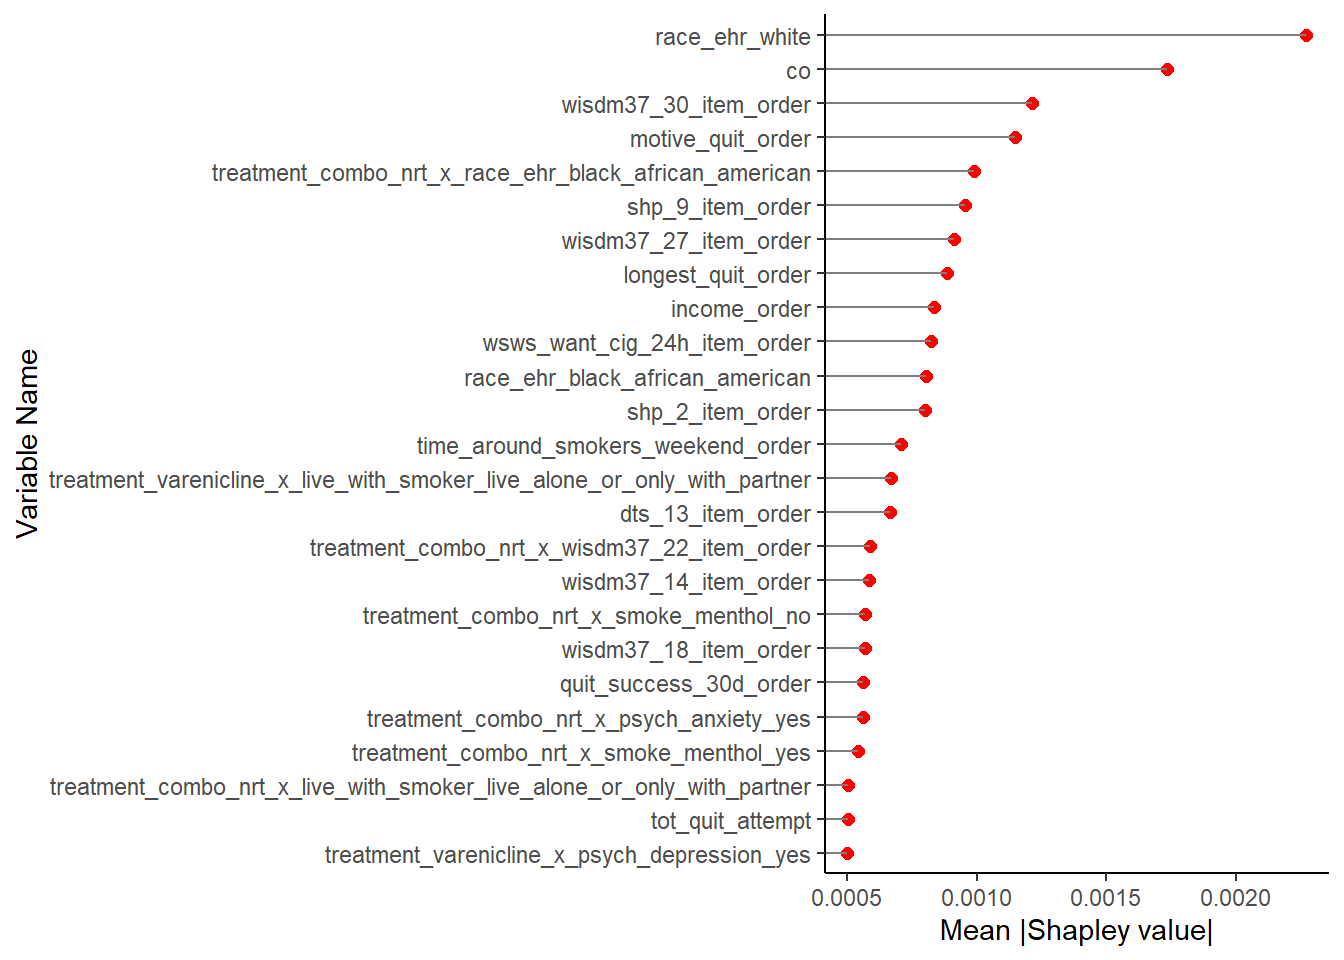

In [ ]:

global |> 
  arrange(desc(abs_shap)) |> 
  slice(1:25) |> 
  arrange(abs_shap) |> 
  mutate(variable_name = fct_inorder(variable_name)) |> 
  ggplot(mapping = aes(x = variable_name, y = abs_shap)) +
  geom_point(size = 2, color = "red") +
  geom_segment(aes(x = variable_name, y = abs_shap, xend = variable_name),
               yend = 0, colour = "grey50") +
  labs(
    x = "Variable Name",
    y = "Mean |Shapley value|"
  ) +
  coord_flip()


Global Shapley values among treatment interactions

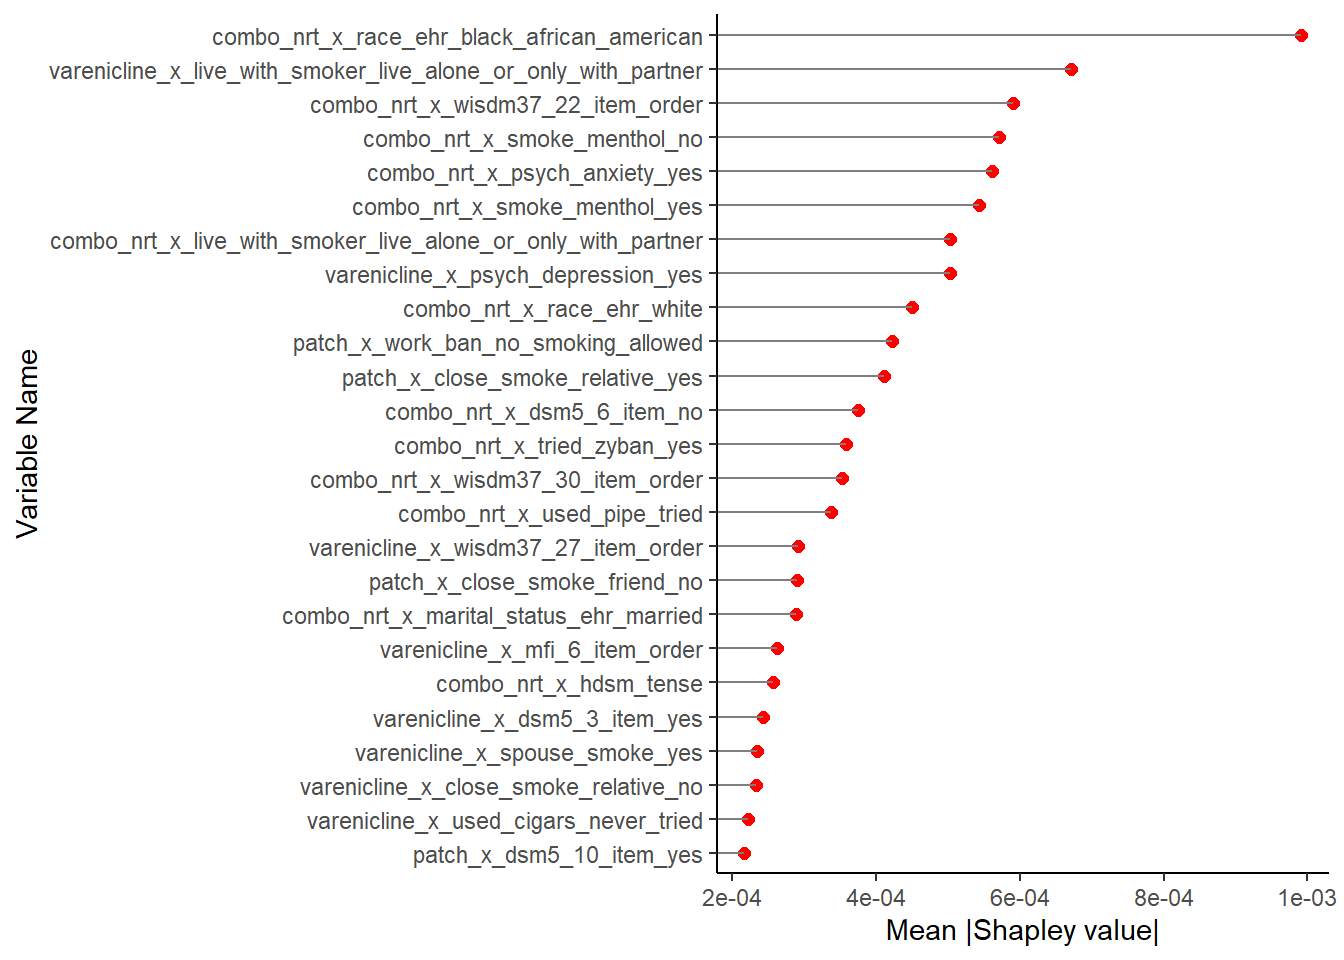

In [ ]:

global_tx |> 
  arrange(desc(abs_shap)) |> 
  slice(1:25) |> 
  arrange(abs_shap) |> 
  mutate(variable_name = str_replace(variable_name, "treatment_", "")) |> 
  mutate(variable_name = fct_inorder(variable_name)) |> 
  ggplot(mapping = aes(x = variable_name, y = abs_shap)) +
  geom_point(size = 2, color = "red") +
  geom_segment(aes(x = variable_name, y = abs_shap, xend = variable_name),
               yend = 0, colour = "grey50") +
  labs(
    x = "Variable Name",
    y = "Mean |Shapley value|"
  ) +
  coord_flip()
